<a href="https://colab.research.google.com/github/Disidente87/Tripleten-da-sprint7-final-project/blob/main/ConnectaTel-main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel.

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


---
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [ ]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv') #completa el código
usage = pd.read_csv('/datasets/usage.csv')  #completa el código

In [ ]:
# mostrar las primeras 5 filas de plans
plans.head(5)

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [ ]:
# mostrar las primeras 5 filas de users
users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [ ]:
# mostrar las primeras 5 filas de usage
usage.head(5)

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [ ]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [ ]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [ ]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [ ]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [ ]:
# cantidad de nulos para users
print( users.isnull().sum() )  # Cantidad de valores nulos)
print( users.isnull().mean() )# Proporción de valores nulos)

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [ ]:
# cantidad de nulos para usage
print( usage.isnull().sum())
print( usage.isnull().mean())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos.

 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

**Observaciones**
- Users.city (11% nulos) - Se mantienen los datos nulos. Pueden servir para la segmentacion por edad.
- Users.churn_date (88% nulos) - Se mantienen como nulos. Es un comportamiento esperado para churn_date
- Usage.duration (55% nulos) - Se mantienen como nulos. Se complementa con la columna 'length'
- Usage.length (44% nulos) - Se mantienen como nulos. Se complementa con la columna 'duration'

- Se observa una anomalia en la tabla Usage. La suma de los no-nulos de length y duration deberia ser igual al total de los renglones o inferior sin embargo la suma es superior a los 40000 registros de la tabla, lo que supone que hay datos corrupttos en donde hay duration y length para el mismo registro. Curiosamente cuando el tipo de registro es 'text' la columna duration muestra un patron de 120.00 y cuando el tipo es 'call', la columna length muestra 1490.0 en el registro. Tal vez se limpien esos datos mas adelante.

In [ ]:
df_test = usage[usage['duration'].notna() & usage['length'].notna()]

print("Shape: ", df_test.shape)
print()
df_test.head(15)

Shape:  (28, 6)



,id,user_id,type,date,duration,length
1414,1415,10399,text,2024-01-07 09:33:51.260781519,120.00,65.0
1824,1825,12936,text,2024-01-09 06:05:28.868221705,120.00,40.0
1932,1933,10189,text,2024-01-09 17:49:13.603840096,120.00,69.0
2070,2071,13139,call,2024-01-10 08:48:27.432685817,1.68,1490.0
2972,2973,10085,text,2024-01-14 10:46:02.169054226,120.00,68.0
5272,5273,11750,call,2024-01-24 20:33:12.649816245,3.78,1490.0
10614,10615,13855,call,2024-02-18 00:42:33.183829595,0.53,1490.0
11456,11457,13325,text,2024-02-21 20:09:09.733743343,120.00,23.0
12692,12693,12263,call,2024-02-27 10:23:08.374709367,1.80,1490.0
16702,16703,10484,text,2024-03-16 13:52:57.169429235,120.00,48.0


### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [ ]:

# explorar columnas numéricas de users
users.describe()


,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` es un folio consecutivo, no nos da informacion para analizar.
- La columna `age` tiene sentinels que bajan mucho el promedio (casi al nivel del percentil 25%). El valor maximo parece real y razonable, analizaremos el minimo despues de tratar los sentinels

In [ ]:
# explorar columnas numéricas de usage
usage.describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- Las columnas `id` y `user_id` son folios consecutivos, no proveen mayor informacion.
- Las columnas `duration` y `length` tienen outliers que podrian ser invalidos ya que se repiten en varios registros, sin embargo tambien es posible que las llamadas muy extensas sean cortadas a los 120.00 minutos por parte de la operadora y tengan que volver a inicializarse, esto podria ser una razon para tener llamadas de 120.00 minutos exactamente. Esta misma situacion podria estar sucediendo con la longitud de los mensajes, la operadora podria limitar la longitud de los mensajes a 1490.00 caracteres y existe la posibilidad de que algunos usuarios manden textos largos que tengan que ser divididos en mas de 1 mensaje de texto por lo cual el primer mensaje se registra con la longitud maxima (1490) y el segundo mensaje contiene el resto de los caracteres. Tambien vemos que los valores minimos estan en 0.000 lo cual indica que fueron llamadas de 0 .00 minutos o mensajes de texto con 0.00 caracteres, lo cual seria muy raro.  Sin mas contexto no podemos determinar si son datos invalidos por lo que mantendremos tanto a los minimos (0.00) commo los outliers de cada columna (120.00 y 1490.00)

In [ ]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
users[columnas_user].describe()


,city,plan
count,3531,4000
unique,7,2
top,Bogotá,Basico
freq,808,2595


- La columna `city` muestra 7 valores unicos. Probablemente 6 ciudades + '?' siendo Bogota la que aparece con mayor frecuencia
- La columna `plan` muestra que unicamente hay 2 planes (lo cual es congruente con la tabla 'plans') siendo el plan Basico el mas popular

In [ ]:
# explorar columna categórica de usage
usage['type'].describe() # completa el código

count     40000
unique        2
top        text
freq      22092
Name: type, dtype: object

- La columna `type` muestra que solamente existen 2 valores unicos ('text' y 'call') siendo 'text' el mas utilizado


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso.

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?
      - **Sentinels** en la columna `age`
      - **invalidos** en la columna `city` existen valores con '?'
- ¿Qué acción tomarías?
      - Para `age` revisaria que tan frecuente aparece el sentinel (-999) en los registros. Si es menos del 5% de los datos, lo imputaria por la mediana. si es mayor al 5% lo imputaria con la mediana por plan (basico/premium)
      - Para `city` lo imputaria por 'unknown' y estaria atento para revisar si existe una relacion entre city='unknown' y alguna otra columna como churn_date o con los datos que tienen sentinels en age (-999)

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [ ]:
# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d', errors='coerce')  # completa el código

In [ ]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], format='%Y-%m-%d', errors='coerce') # completa el código

In [ ]:
# Revisar los años presentes en `reg_date` de users
users['reg_date'].dt.year.value_counts()

2024    1330
2023    1316
2022    1314
2026      40
Name: reg_date, dtype: int64

En `reg_date`, aparecen datos del 2026

In [ ]:
# Revisar los años presentes en `date` de usage
usage['date'].dt.year.value_counts()

2024.0    39950
Name: date, dtype: int64

En `date`, solamente hay registros de 2024
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos). \n /n SI
- ¿Qué harías con ellas? Ya que los datos invalidos estan presentes en la columna `reg_date` de la tabla Users y los numeros de folio se asignan consecutivamente conforme se registra un nuevo usuario, podriamos imputar los datos con el punto medio (promedio) entre el renglon anterior y el renglon posterior a dicho registro. Si existen 2 o mas registros consecutivos que sean invalidos, usaria la formula ( date_row_before + ( (date_row_after - date_row_before) / (qty_of_consecutive_invalid_rows + 1) ) ) para asegurar una distribucion proporcional en las fechas de registro imputadas.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [ ]:
# Reemplazar -999 por la mediana de age
age_mediana = users['age'].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()

count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [ ]:
# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?', pd.NA)

# Verificar cambios
users['city'].describe()

count       3435
unique         6
top       Bogotá
freq         808
Name: city, dtype: object

In [ ]:
# Marcar fechas futuras como NA para reg_date
users.loc[users['reg_date'].dt.year > 2024, 'reg_date'] = pd.NaT


# Verificar cambios

users['reg_date'].describe()

count                              3960
unique                             3960
top       2024-06-27 06:08:22.325581392
freq                                  1
first               2022-01-01 00:00:00
last                2024-12-31 00:00:00
Name: reg_date, dtype: object

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [ ]:
# Verificación MAR en usage (Missing At Random) para duration
usage['duration'].isna().groupby(usage['type']).sum()

type
call        0
text    22076
Name: duration, dtype: int64

In [ ]:
# Verificación MAR en usage (Missing At Random) para length
usage['length'].isna().groupby(usage['type']).sum()

type
call    17896
text        0
Name: length, dtype: int64

Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`

Los nulos en las columnas `duration` y length` dependen completamente de la columna `type`. Tiene sentido ya que 'call' se mide en tiempo de duracion de la llamada ('duration') y 'text' se mide en  numero de caracteres o la longitud del texto ('length'). Se conservan como nulos.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico.

**Instrucciones:**:
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [ ]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage.groupby('user_id')['is_text','is_call','duration'].sum().reset_index()

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Renombrar columnas
usage_agg.rename(columns={'is_text': 'cant_mensajes','is_call': 'cant_llamadas','duration': 'cant_minutos_llamada'}, inplace=True)
# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = pd.merge(users, usage_agg, on='user_id', how='left')

user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [ ]:
# Resumen estadístico de las columnas numéricas
user_profile.describe()

,user_id,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,4000.000000,3999.000000,3999.000000,3999.000000
mean,11999.500000,48.122250,5.524381,4.478120,23.317054
std,1154.844867,17.690408,2.358416,2.144238,18.168095
min,10000.000000,18.000000,0.000000,0.000000,0.000000
25%,10999.750000,33.000000,4.000000,3.000000,11.120000
50%,11999.500000,47.000000,5.000000,4.000000,19.780000
75%,12999.250000,63.000000,7.000000,6.000000,31.415000
max,13999.000000,79.000000,17.000000,15.000000,155.690000


In [ ]:
# Distribución porcentual del tipo de plan
user_profile['plan'].value_counts(normalize=True)

Basico     0.64875
Premium    0.35125
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada`

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda)

**Hint**  
Para cada histograma,
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

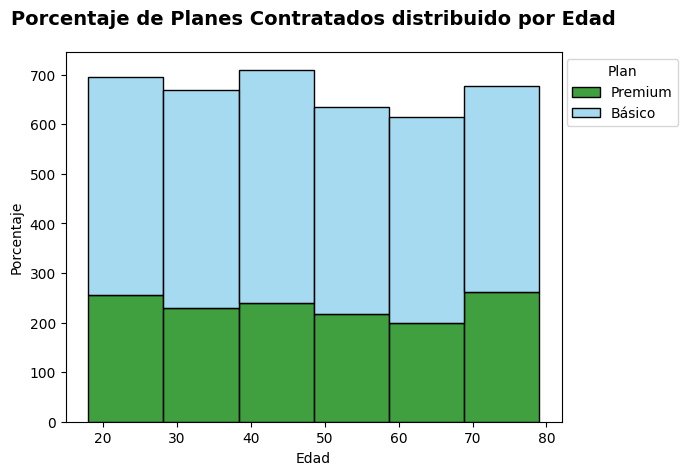

In [ ]:
# Histograma para visualizar la edad (age)
from matplotlib.ticker import PercentFormatter



sns.histplot(data = user_profile,
             x = 'age',
             hue = 'plan',
             multiple = "stack",
             stat = 'count',
             palette = ['skyblue','green'],
             #discrete = True,
             bins = 6,
             #binwidth = 5,
             #binrange = (user_profile['age'].min(),user_profile['age'].max()+10)
            )
plt.title("Porcentaje de Planes Contratados distribuido por Edad",fontsize=14, fontweight='bold', pad=20)
plt.xlabel("Edad")
plt.ylabel("Porcentaje")
plt.legend(title='Plan',
    labels=['Premium','Básico'],
    loc=(1.01,0.8))       # Position the legend

#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()




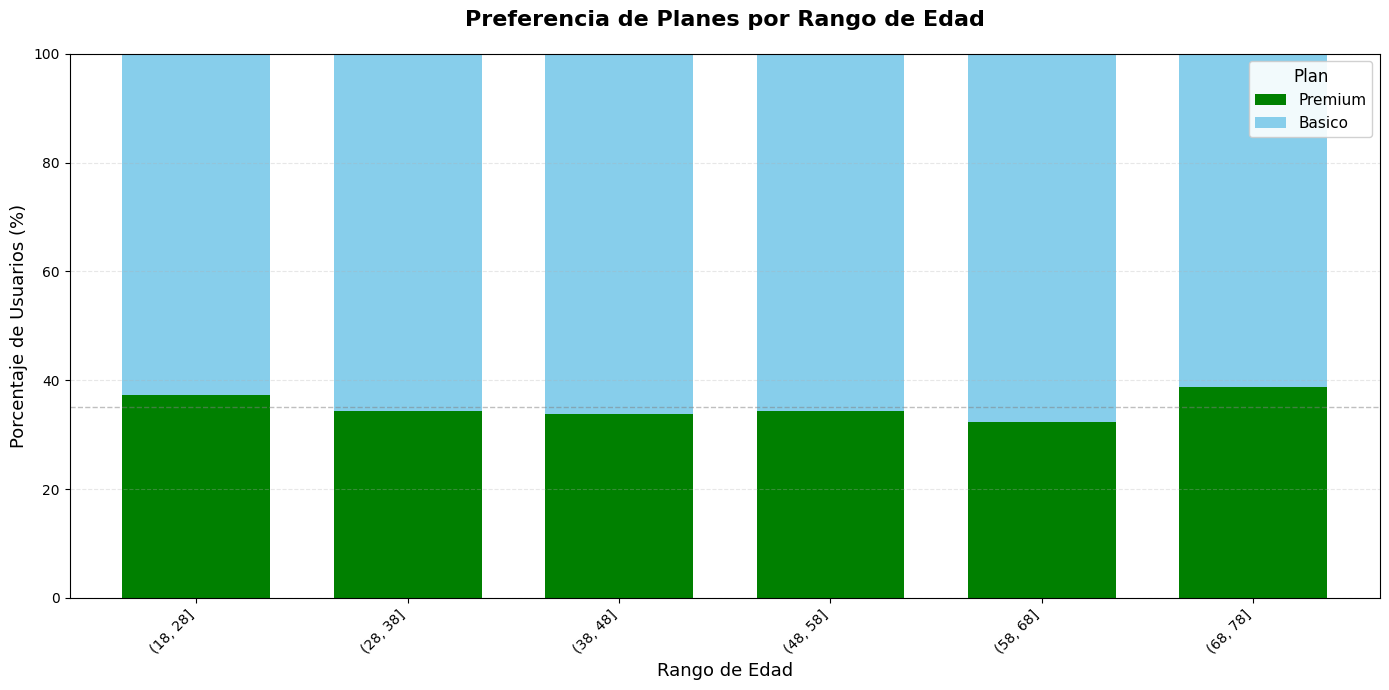

In [ ]:

#Dividir los bins por rangos de X años
user_profile['rango_edad'] = pd.cut(user_profile['age'],
                            bins=range(user_profile['age'].min().astype(int),
                                       user_profile['age'].max().astype(int),
                                       round((user_profile['age'].max() - user_profile['age'].min()) / 6)))

# Calcular proporciones
prop_tabla = pd.crosstab(user_profile['rango_edad'], user_profile['plan'], normalize='index') * 100

#invertir el orden en que se muestran en la grafica
prop_tabla= prop_tabla[['Premium','Basico']]

fig, ax = plt.subplots(figsize=(14, 7))

# Crear gráfico apilado
prop_tabla.plot(kind='bar', stacked=True, ax=ax,
                color=['green','skyblue'], width=0.7)

# Añadir línea horizontal en 50%
ax.axhline(y=35, color='gray', linestyle='--', alpha=0.5, linewidth=1)

# Configuración
ax.set_title('Preferencia de Planes por Rango de Edad',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Rango de Edad', fontsize=13)
ax.set_ylabel('Porcentaje de Usuarios (%)', fontsize=13)
ax.set_ylim(0, 100)
ax.legend(title='Plan', fontsize=11, title_fontsize=12, framealpha=0.9)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


💡Insights:
- Distribución normal en la relacion edad vs plan.
- No se observa relacion marcada entre la preferencia de los planes dependiendo de la edad de los usuarios

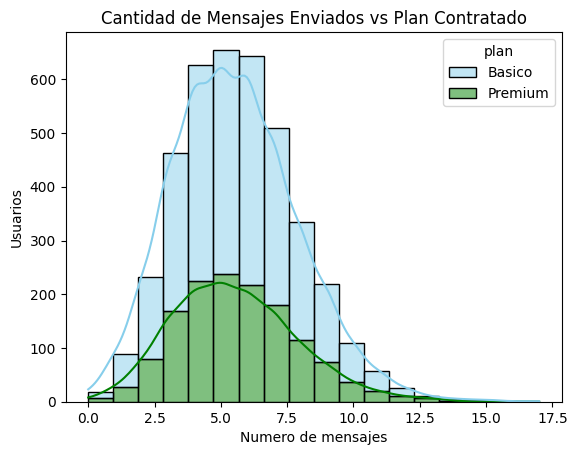

In [ ]:
# Histograma para visualizar la cant_mensajes


sns.histplot(data = user_profile,
             x = 'cant_mensajes',
             hue = 'plan',
             multiple = "stack",
             stat = 'count',
             palette = ['skyblue','green'],
             kde = True,
             #discrete = True,
             bins = 18,
             #binwidth = 5,
             #binrange = (user_profile['age'].min(),user_profile['age'].max()+10)
            )
plt.title("Cantidad de Mensajes Enviados vs Plan Contratado")
plt.xlabel("Numero de mensajes")
plt.ylabel("Usuarios")
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()




💡Insights:
- La Distribucion tiene un sesgo a la izquierda para ambos planes.
- Los usuarios en su mayoria envian de 4-6 mensajes independientemente del plan contratado

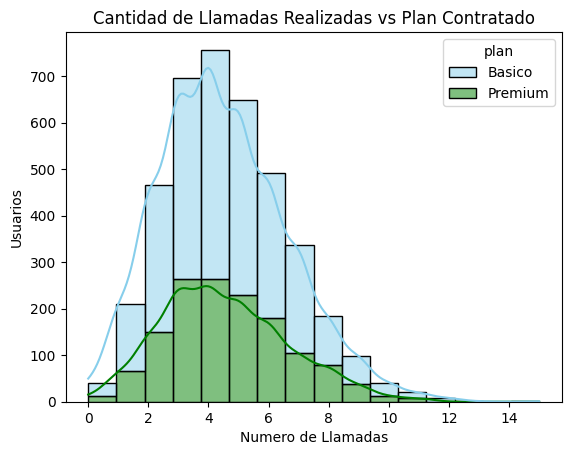

In [ ]:
# Histograma para visualizar la cant_llamadas


sns.histplot(data = user_profile,
             x = 'cant_llamadas',
             hue = 'plan',
             multiple = "stack",
             stat = 'count',
             palette = ['skyblue','green'],
             kde = True,
             #discrete = True,
             bins = 16,
             #binwidth = 5,
             #binrange = (user_profile['age'].min(),user_profile['age'].max()+10)
            )
plt.title("Cantidad de Llamadas Realizadas vs Plan Contratado")
plt.xlabel("Numero de Llamadas")
plt.ylabel("Usuarios")
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()



💡Insights:
- La Distribucion tiene un sesgo a la izquierda para ambos planes.
- Los usuarios en su mayoria realizan de 3-5 llamadas independientemente del plan contratado


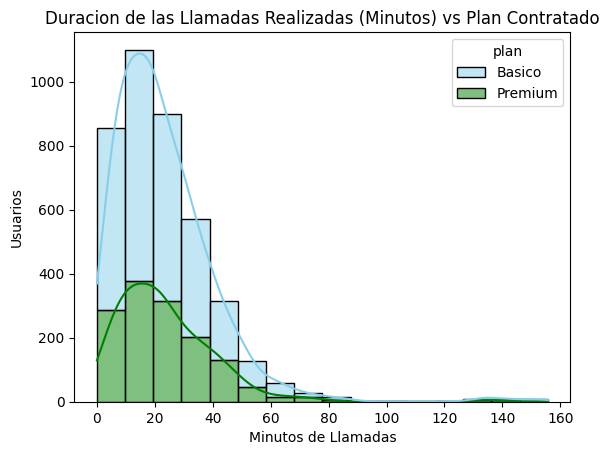

In [ ]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data = user_profile,
             x = 'cant_minutos_llamada',
             hue = 'plan',
             multiple = "stack",
             stat = 'count',
             palette = ['skyblue','green'],
             kde = True,
            # discrete = True,
             bins = 16,
             #binwidth = 5,
             #binrange = (user_profile['age'].min(),user_profile['age'].max()+10)
            )
plt.title("Duracion de las Llamadas Realizadas (Minutos) vs Plan Contratado")
plt.xlabel("Minutos de Llamadas")
plt.ylabel("Usuarios")
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()


💡Insights:
- La Distribucion tiene un sesgo a la izquierda para ambos planes.
- Los usuarios en su mayoria realizan llamadas con una duracion inferior a los 30 minutos independientemente del plan contratado


### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age`
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

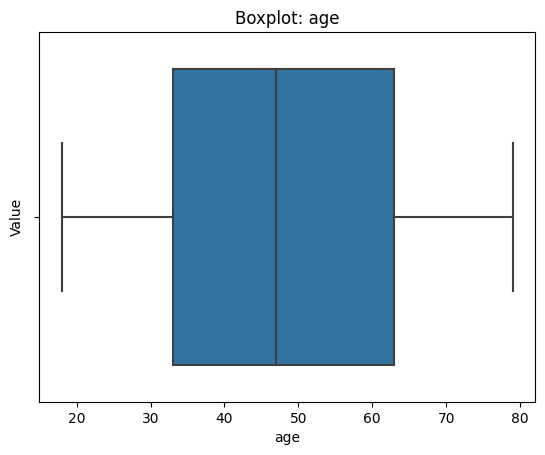

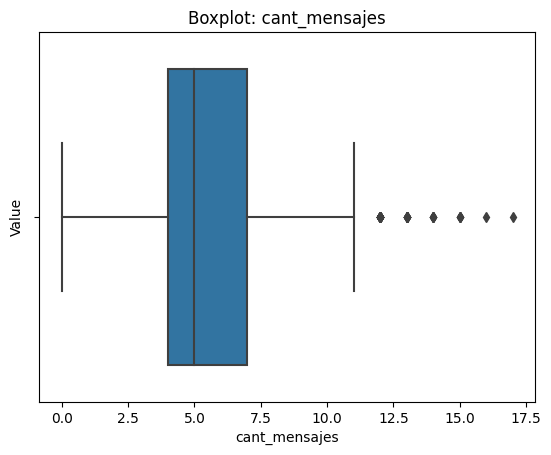

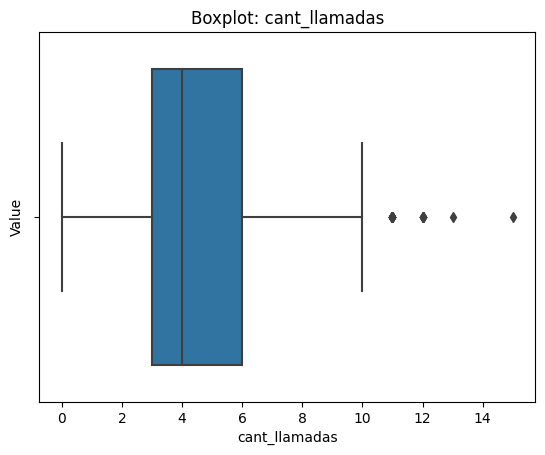

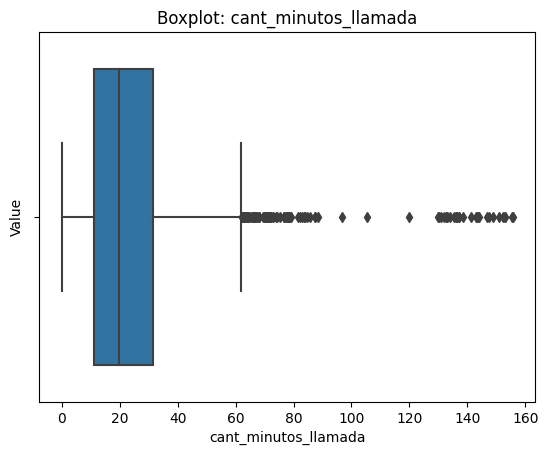

In [ ]:
# Visualizando usando BoxPlot
columnas_numericas = ['age','cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    sns.boxplot(user_profile[col])
    plt.title(f'Boxplot: {col}')
    plt.ylabel("Value")
    plt.show()



💡Insights:
- Age: No presenta Outliers
- cant_mensajes: Tiene Outliers a la derecha (max)
- cant_llamadas: Tiene Outliers a la derecha (max)
- cant_minutos_llamada: Tiene Outliers a la derecha (max)

In [ ]:
# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1
    #lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    total_outliers = (user_profile[col] > upper_limit).sum()
    total_data = round(user_profile[col].sum())
    outliers_percent = round( ( total_outliers / total_data ) * 100, 2)
    print("Limite superior para ",col," = ",upper_limit)
    print("Cantidad de Outliers: ", total_outliers, " de ", total_data, "equivalente a: ", outliers_percent, "%")
    print()


Limite superior para  cant_mensajes  =  11.5
Cantidad de Outliers:  46  de  22092 equivalente a:  0.21 %

Limite superior para  cant_llamadas  =  10.5
Cantidad de Outliers:  30  de  17908 equivalente a:  0.17 %

Limite superior para  cant_minutos_llamada  =  61.8575
Cantidad de Outliers:  109  de  93245 equivalente a:  0.12 %



In [ ]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


💡Insights:

- cant_mensajes: Mantener Outliers. Los outliers representan menos del 0.25% de los datos y parecen datos de un usuario real.
- cant_llamadas: Mantener Outliers. Los outliers representan menos del 0.25% de los datos y parecen datos de un usuario real.
- cant_minutos_llamada: Mantener Outliers. Los outliers representan menos del 0.25% de los datos y parecen datos de un usuario real.


---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [ ]:
# Crear columna grupo_uso


user_profile['grupo_uso'] = np.where(
    ((user_profile['cant_llamadas'] < 5) & (user_profile['cant_mensajes'] < 5)),
    "Bajo Uso",
    np.where(
        ((user_profile['cant_llamadas'] < 10) & (user_profile['cant_mensajes'] < 10)),
        "Uso medio",
        "Alto uso"))


In [ ]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,rango_edad,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,"(28, 38]",Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,"(48, 58]",Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,"(48, 58]",Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,"(68, 78]",Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,"(58, 68]",Bajo Uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [ ]:
# Crear columna grupo_edad
user_profile['grupo_edad'] = np.where(
    (user_profile['age'] < 30),
    "Joven",
    np.where(
        (user_profile['age'] < 60),
        "Adulto",
        "Adulto Mayor"))



In [ ]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,rango_edad,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,"(28, 38]",Uso medio,Adulto Joven
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,"(48, 58]",Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,"(48, 58]",Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,"(68, 78]",Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,"(58, 68]",Bajo Uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

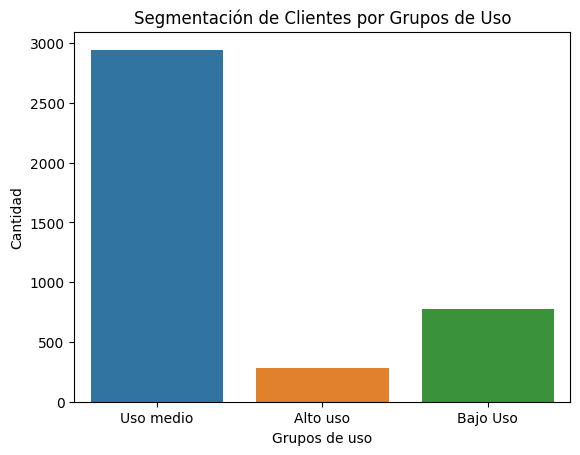

In [ ]:
# Visualización de los segmentos por uso
sns.countplot(x='grupo_uso', data=user_profile)
plt.title("Segmentación de Clientes por Grupos de Uso")
plt.xlabel("Grupos de uso")
plt.ylabel("Cantidad")
plt.show()

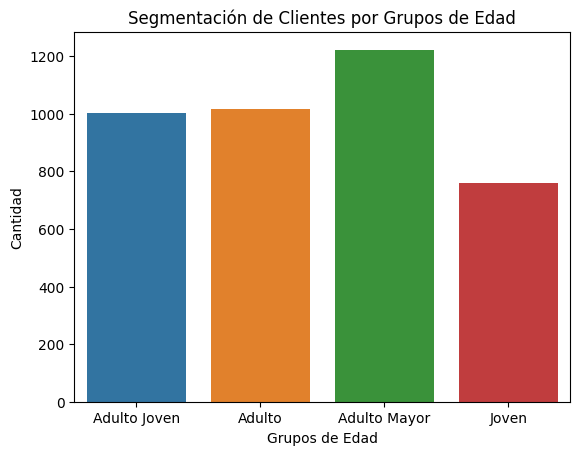

In [ ]:
# Visualización de los segmentos por edad
sns.countplot(x='grupo_edad', data=user_profile)
plt.title("Segmentación de Clientes por Grupos de Edad")
plt.xlabel("Grupos de Edad")
plt.ylabel("Cantidad")
plt.show()

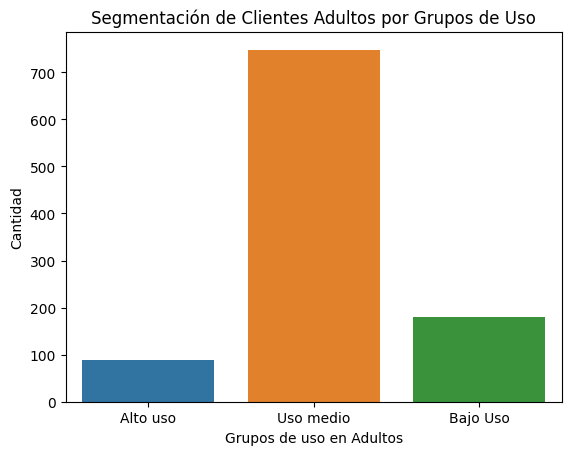

In [ ]:


# Visualización de los segmentos por uso
df_adultos = user_profile[user_profile['grupo_edad'] == "Adulto"]
sns.countplot(x='grupo_uso', data = df_adultos)
plt.title("Segmentación de Clientes Adultos por Grupos de Uso")
plt.xlabel("Grupos de uso en Adultos")
plt.ylabel("Cantidad")
plt.show()



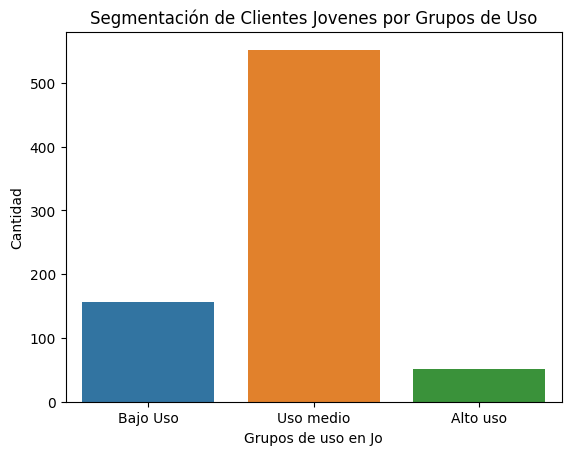

In [ ]:
# Visualización de los segmentos por uso
df_jovenes = user_profile[user_profile['grupo_edad'] == "Joven"]
sns.countplot(x='grupo_uso', data = df_jovenes)
plt.title("Segmentación de Clientes Jovenes por Grupos de Uso")
plt.xlabel("Grupos de uso en Jo")
plt.ylabel("Cantidad")
plt.show()


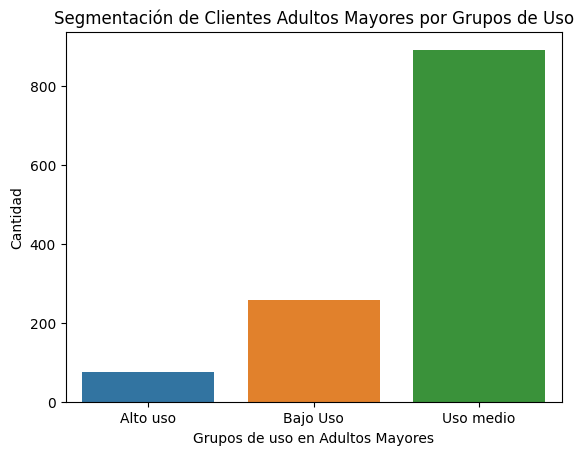

In [ ]:

# Visualización de los segmentos por uso
df_adultos_mayores = user_profile[user_profile['grupo_edad'] == "Adulto Mayor"]
sns.countplot(x='grupo_uso', data = df_adultos_mayores)
plt.title("Segmentación de Clientes Adultos Mayores por Grupos de Uso")
plt.xlabel("Grupos de uso en Adultos Mayores")
plt.ylabel("Cantidad")
plt.show()




---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:**
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**


### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- La columna `age` del df original presenta sentinels (-999) que fueron imputados con la mediana
- La columna `city` del df original contiene valores invalidos ('?') que fueron imputados con 'unknown'


🔍 **Segmentos por Edad**
- El segmento de Adultos representa el mayor segmento poblacional para ConnectaTel
- El segmento de Jovenes representa el menor grupo de usuarios para ConnectaTel
- El Nivel de Uso de los Adultos tiene el mismo comportamiento que el Nivel de Uso general


📊 **Segmentos por Nivel de Uso**
- La mayoria de los usuarios le dan un 'Uso medio' a su plan telefonico.
- Un segmento muy reducido de usuarios le dan un 'Alto uso' al plan telefonico


➡️ Esto sugiere que las nuevas estrategias de captacion podrian enfocarse en clientes jovenes.


💡 **Recomendaciones**

- Realizar una investigacion para identificar las preferencias de uso de los Jovenes y adaptar planes y ofertas para atraerlos a ConnectaTel
- Rediseñar planes especiales para incentivar el segmento de 'Alto Uso'. La proporcion de usuarios que hacen un 'alto uso' de su plan es extremadamente reducida. Los nuevos planes podrian atraer nuevs usuarios al mismo tiempo que se incentiva un mayor uso por parte de los usuarios existentes.

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`